***Data Set 1 : Exploration***

General Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../raw_data/ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [18]:
data.work_year.value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [2]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

***Salaries***

In [3]:
data ["salary_in_usd"].max() #Largest Salary 30Million
top_10_salaries = data['salary_in_usd'].nlargest(10)
top_10_salaries
data ["salary_in_usd"].median() # median is 135000

135000.0

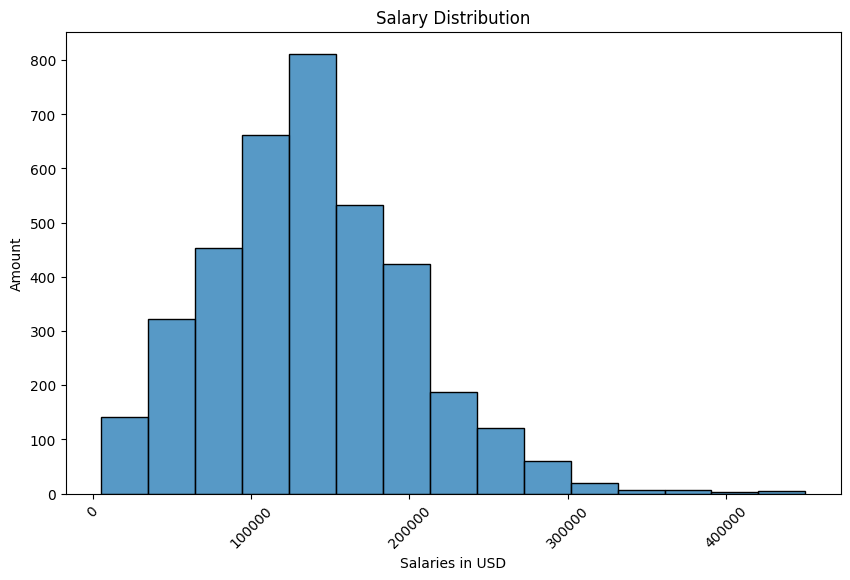

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=15)
plt.xticks(rotation=45)

plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=15)
plt.xticks(rotation=45)

plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()

***Job Titles***

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

job_titles = data["job_title"].unique()
job_titles

# keywords
keywords = ["Scientist",  "Machine", "Analyst", "AI", "BI", "Engineer", "Research", "Analytics", "Vision", "Architect", "Developer", "Manager", "Head", "Lead", "Cloud", "Specialist", "Principal"]

# create dictionary
clusters = {keyword: [] for keyword in keywords}
clusters["Others"] = []

# assign job titles
for title in job_titles:
    matched = False
    for keyword in keywords:
        if keyword.lower() in title.lower():
            clusters[keyword].append(title)
            matched = True
    if not matched:
        clusters["Others"].append(title)

# Ausgabe der Cluster
for keyword, titles in clusters.items():
    print(f"\nCluster für '{keyword}':")
    for title in titles:
        print(title)


Cluster für 'Scientist':
Principal Data Scientist
Data Scientist
Applied Scientist
Research Scientist
Applied Data Scientist
Machine Learning Scientist
AI Scientist
Applied Machine Learning Scientist
Lead Data Scientist
Data Scientist Lead
Product Data Scientist
Staff Data Scientist

Cluster für 'Machine':
Machine Learning Engineer
Applied Machine Learning Engineer
Machine Learning Researcher
Machine Learning Scientist
Applied Machine Learning Scientist
Machine Learning Infrastructure Engineer
Machine Learning Software Engineer
Machine Learning Research Engineer
Machine Learning Developer
Principal Machine Learning Engineer
Machine Learning Manager
Lead Machine Learning Engineer
Head of Machine Learning

Cluster für 'Analyst':
Data Analyst
Data Quality Analyst
Compliance Data Analyst
Business Data Analyst
Staff Data Analyst
Lead Data Analyst
Financial Data Analyst
BI Analyst
BI Data Analyst
Insight Analyst
Product Data Analyst
Data Operations Analyst
Marketing Data Analyst
Principal D

*** Charts: Countries, Job titles etc.  ***

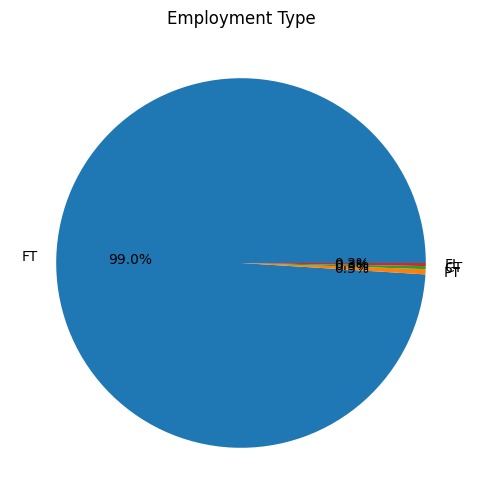

employment_type
FT    99.014647
PT     0.452730
CT     0.266312
FL     0.266312
Name: proportion, dtype: float64

In [15]:
employment_type_percentages = data["employment_type"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%')
plt.title("Employment Type")
plt.show()

employment_type_percentages

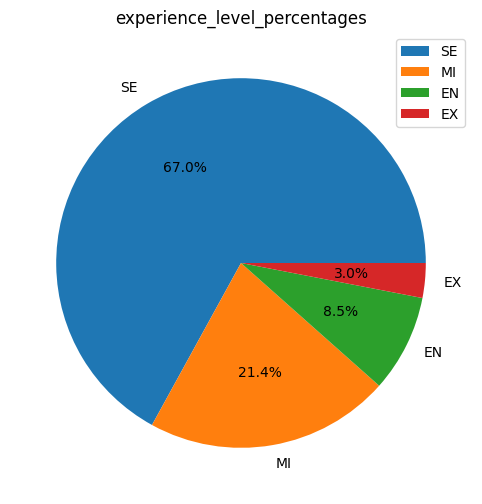

experience_level
SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: proportion, dtype: float64

In [17]:
experience_level_percentages = data["experience_level"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(experience_level_percentages, labels=experience_level_percentages.index, autopct='%1.1f%%')
plt.title("experience_level_percentages")
plt.legend()
plt.show()

experience_level_percentages

***Cleaning, Outliers etc...***

<Axes: >

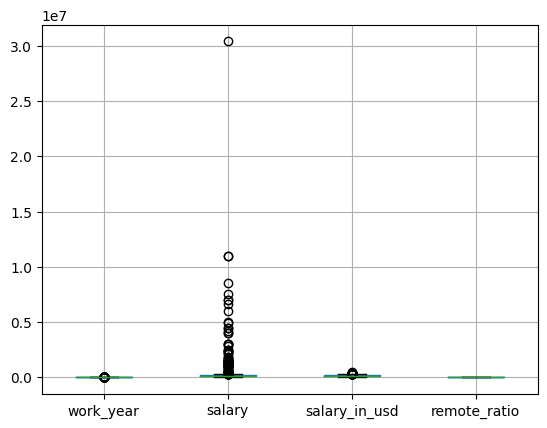

In [6]:
# data.isnull().sum() --> no missing data!
data.boxplot() # Salary has outliers. 

In [7]:
data.duplicated().sum() # Are these really duplicates? What to do? 

1171

***Scaling the data***

In [8]:
X = data.drop(columns=["salary", "salary_currency", "salary_in_usd"])
y = data ["salary_in_usd"]
X

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,ES,100,ES,L
1,2023,MI,CT,ML Engineer,US,100,US,S
2,2023,MI,CT,ML Engineer,US,100,US,S
3,2023,SE,FT,Data Scientist,CA,100,CA,M
4,2023,SE,FT,Data Scientist,CA,100,CA,M
...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,US,100,US,L
3752,2020,EN,FT,Data Scientist,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,US,100,US,L


We only scale X, there only the column remote_ratio contains numerical values (100,   0,  50). If scaling is necessary depends on the ML model. 

We don't scale y.... But in case we need to: salary contains outliers, therefore Robust Scaler is the best choice. 

Sjoerd: 
- work_year how to treat it?
- encode all columns and then scale them toghether, or create two pipelines? 


***Encoding the data***


Colums without order: 
- One hot encoder
- Job_title, employee_residence,company_location

Columns with order: 
- work_year, experience_level, employment_type, remote_ratio, company_size
- size mapping, e.g. for company size: 
size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5}

--> After Encoding; Setup a preprocessing pipeline, to encode all features. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Columns to encode
encode_columns = ["experience_level", "employment_type", "job_title", "employee_residence"]

# Instantiate Encoder
ohe = OneHotEncoder()

# Fit and transform Encoder
encoded_columns = ohe.fit_transform(data[encode_columns]).toarray()

# create dataframe
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(encode_columns))

# drop original columns from data
data_encoded = data.drop(columns=encode_columns)

# add encoded columns to data
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded
